In [1]:
import seaborn as sns
import pandas as pd
sns.set_style("whitegrid")

In [2]:
path = "Z:/JulietteG/6-Etutes_Antares/BP23_A_EU_Xeq_socle_thermique_2041_postcalage_marg98_stock/user"

In [3]:
suf = '_constant'

# Facteur de charge annuel

In [5]:
df = pd.read_excel(path+"/facteur_de_charge"+suf+".xlsx")
# df["name"] = df["name"].apply(lambda x:x.split("/")[-1].split("-")[-1])
# df["name"] = df["name"].apply(lambda x:"initial_simulation" if x=='vu_initial_other_vu' else pd.NA if x in ['initial_simulation','initial_simulation_zmargcost'] else x)
df.dropna(inplace=True)

In [12]:
df["Prix"] = df["name"].apply(lambda x:".".join(x.split("_")[1:])) 
df["Scénario"] = df["mcYear"].apply(lambda x:str(x))
df["Facteur de charge annuel"] = df["fc"]


In [13]:
df["name"].unique()

array(['vu_-40_81', 'vu_-40.84', 'vu_-40.83'], dtype=object)

In [14]:
df[df.mcYear==11]

,mcYear,zone,fc,name,Prix,Scénario,Facteur de charge annuel
0,11,eu,0.538774,vu_-40_81,-40.81,11,0.538774
10,11,eu,0.628775,vu_-40.84,-40.84,11,0.628775
20,11,eu,0.627462,vu_-40.83,-40.83,11,0.627462


In [15]:
df[["name","fc"]].groupby(["name"]).mean()

,fc
name,
vu_-40.83,0.602613
vu_-40.84,0.604587
vu_-40_81,0.518024


<Axes: xlabel='Scénario', ylabel='Facteur de charge annuel'>

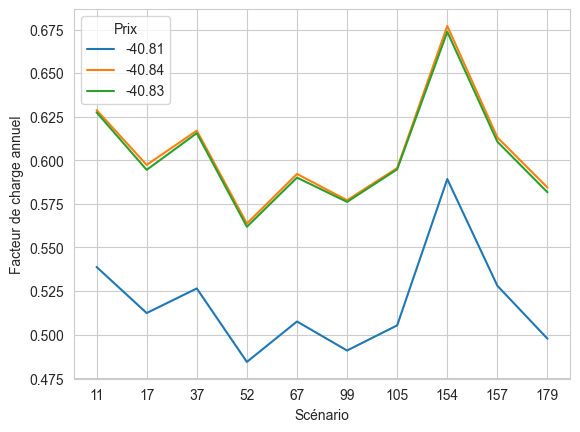

In [17]:
sns.lineplot(x="Scénario", y="Facteur de charge annuel",
             hue="Prix",data=df)

# Facteur de charge hebdo

In [18]:
df = pd.read_excel(path+"/facteur_de_charge_hebdo"+suf+".xlsx")
# df["name"] = df["name"].apply(lambda x:x.split("/")[-1].split("-")[-1])
# df["name"] = df["name"].apply(lambda x:"initial_simulation" if x=='vu_initial_other_vu' else pd.NA if x in ['initial_simulation','initial_simulation_zmargcost'] else x)
df.dropna(inplace=True)

In [19]:
df["Prix"] = df["name"].apply(lambda x:".".join(x.split("_")[1:])) 
df["Scénario"] = df["mcYear"].apply(lambda x:str(x))
df["Semaine"] = df["week"]
df["Facteur de charge hebdomadaire"] = df["fc_direct"]

In [20]:
df[(df.mcYear==11)&(df.week==0)]

,mcYear,week,zone,charge,capa_direct,fc_direct,name,Prix,Scénario,Semaine,Facteur de charge hebdomadaire
0,11,0,eu,10667538,1.916375e+07,0.556652,vu_-40_81,-40.81,11,0,0.556652
520,11,0,eu,12662683,1.916375e+07,0.660762,vu_-40.84,-40.84,11,0,0.660762
1040,11,0,eu,12650218,1.916375e+07,0.660112,vu_-40.83,-40.83,11,0,0.660112


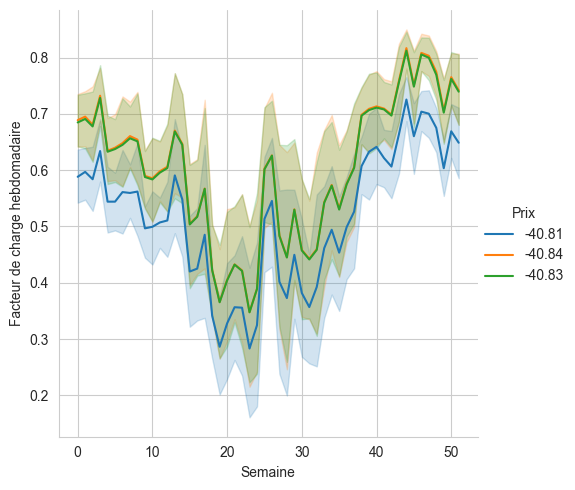

In [21]:
sns.relplot(x="Semaine", y="Facteur de charge hebdomadaire",
hue="Prix",
data=df,kind="line")

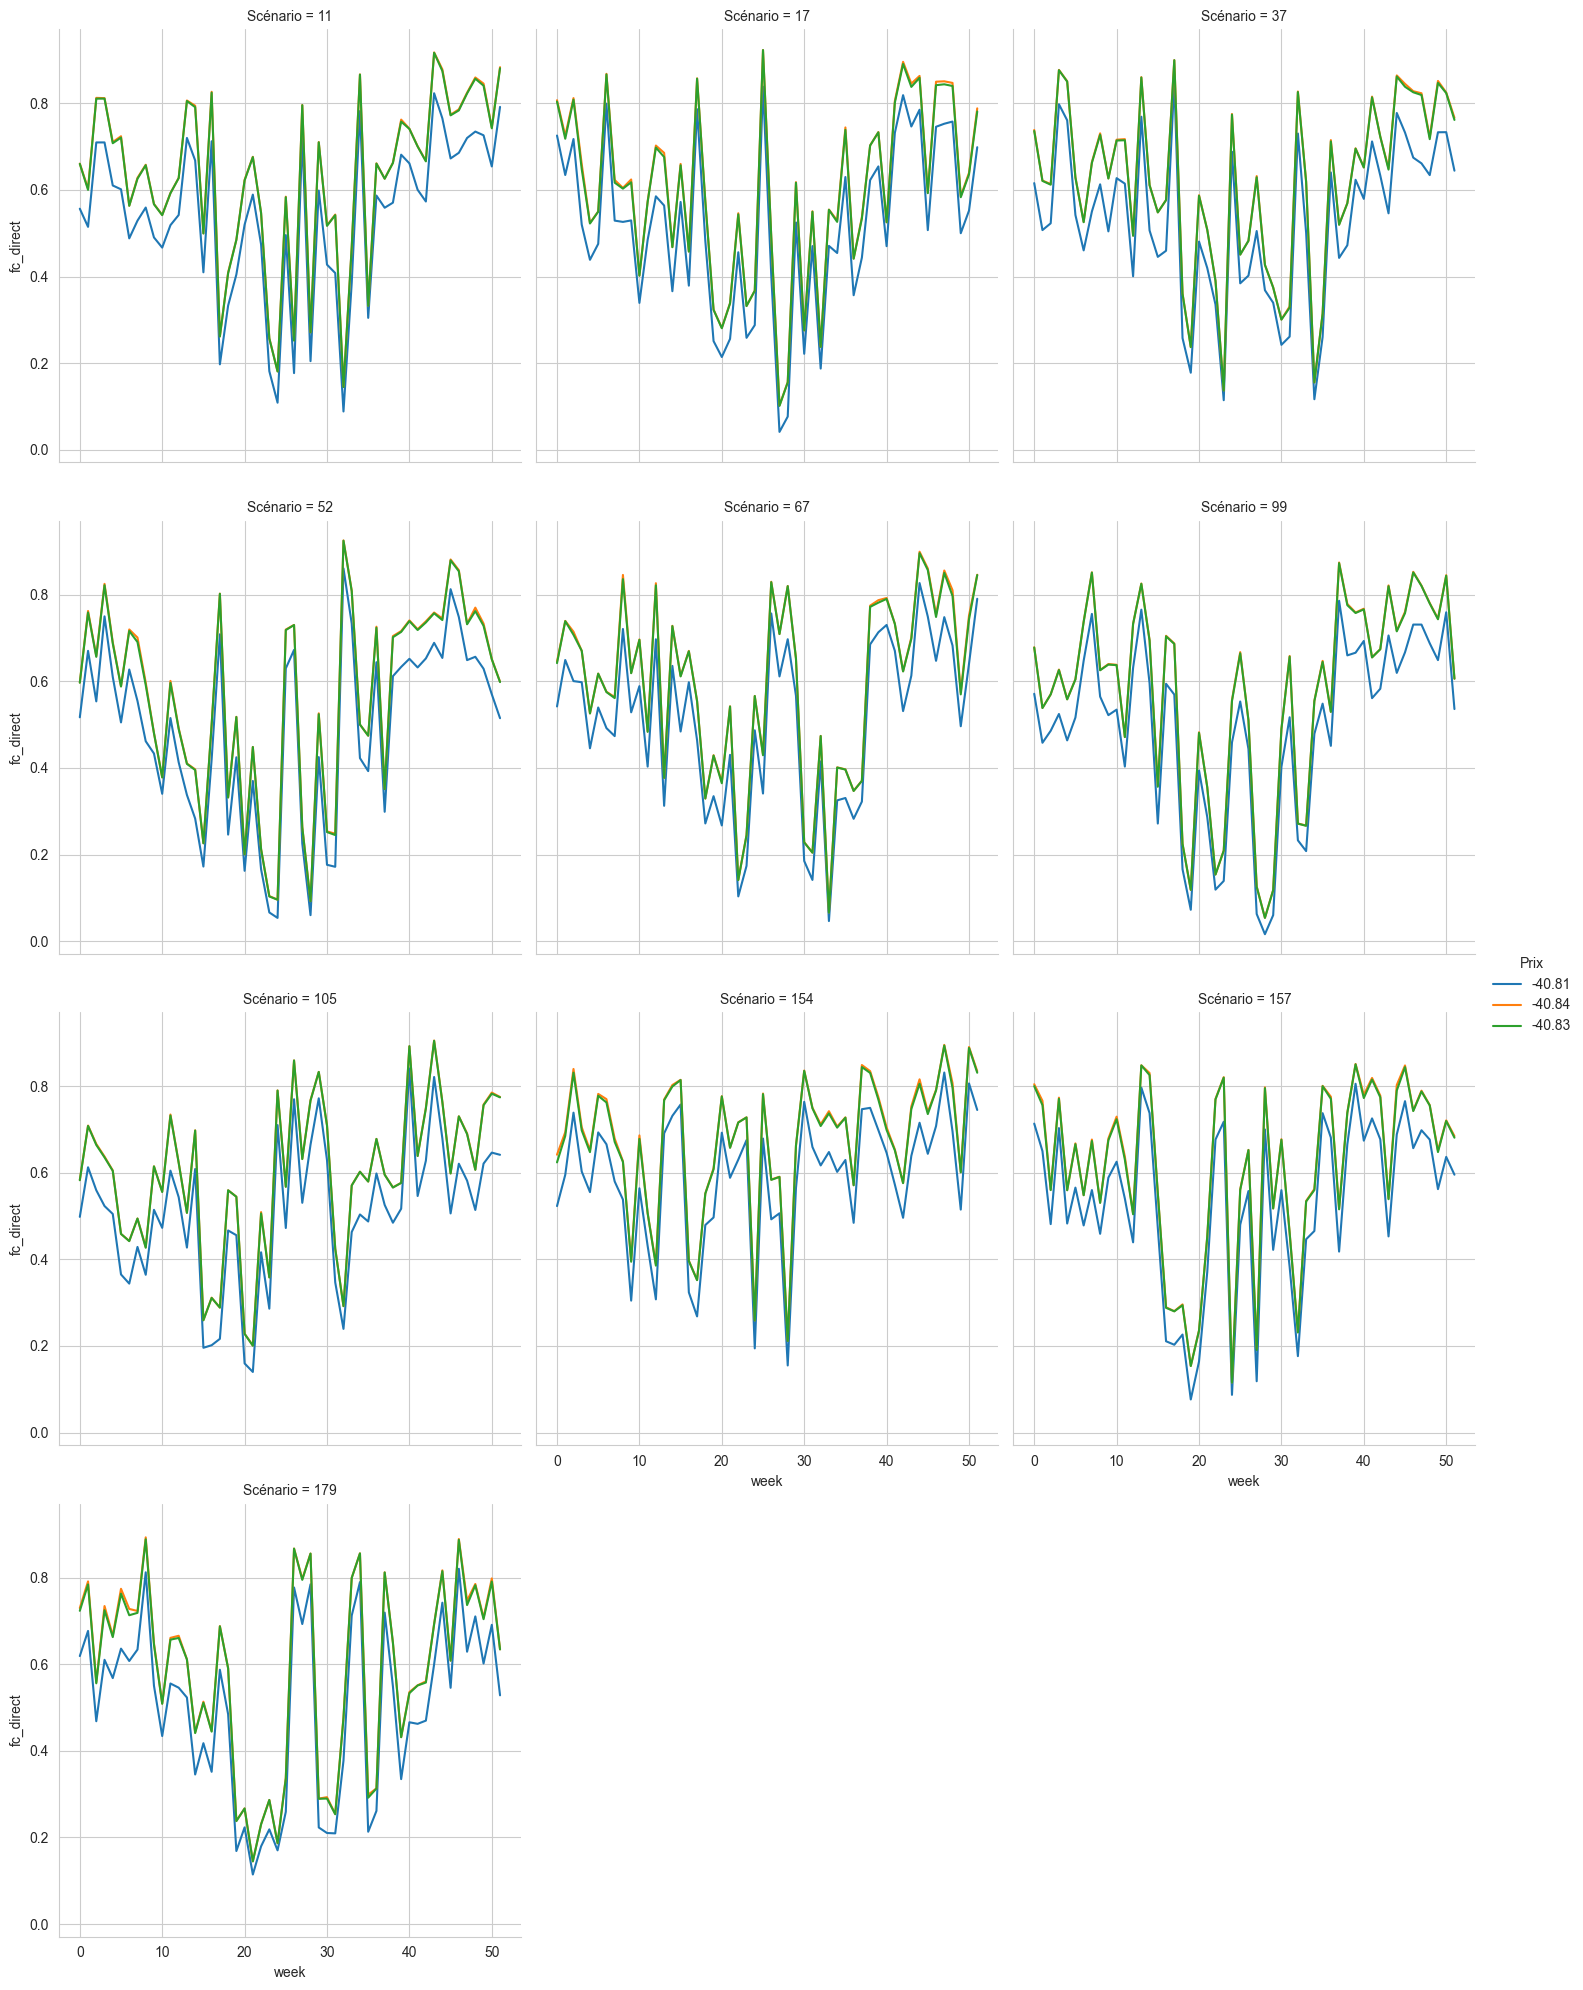

In [22]:
sns.relplot(x="week", y="fc_direct",
             hue="Prix",col="Scénario",
             data=df,kind="line", col_wrap=3)